### Phase Portrait Classification

In [1]:
import numpy as np
import sympy as sp
import scipy 
import matplotlib.pyplot as plt
from sympy import Matrix
import cv2
from cv2 import *
from scipy.optimize import least_squares
import sys
import cma
from sklearn.cluster import KMeans


#### Generating Phase Portraits

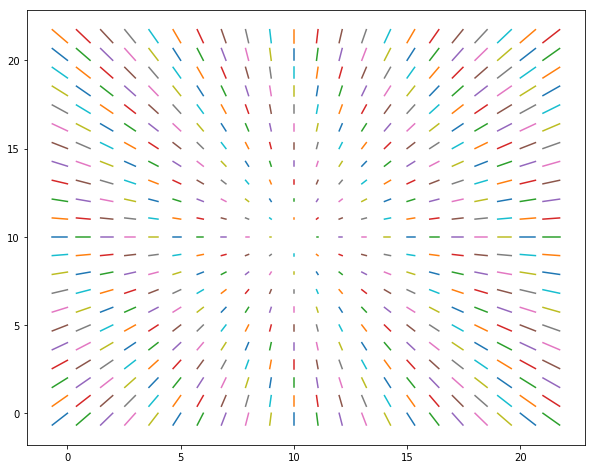

In [74]:
##Circle
# A= np.array([[0, 1],[-1,0]])
##Star
A= np.array([[1, 0],[0,1]])
# Saddle
# A= np.array([[0, 1],[1,0]])
##Spiral
# A= np.array([[0, 1],[-1,-1]])
##Node
# A= np.array([[-4, -2],[-2,-4]])

# A =np.array([[0.0727319840161632, 0], [0, -0.481152931511145]] )
## Window Size
w_size = 11

#To change Image scale
Im_size = 1

N = 11 * Im_size
# N=11


X_dash =  np.zeros((N*2,N*2,2))
x_derivative = np.zeros((N*2,N*2))
y_derivative = np.zeros((N*2,N*2))
# b = np.random.randn()
# print b

# b=[0,0] 
# To generate different flows in different sections of the image
# A= np.array([[0, 1],[-1,0]])
b = [-10,-10]
for i in range (0,N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]

       
        
A= np.array([[1, 0],[0,1]])
b = [-10,-10]
for i in range (0,N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]
        
# b = [-35,35]        
# A= np.array([[0, 1],[1,0]])
for i in range (N,2*N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]

# b = [-15,15]        
# A= np.array([[1, 0],[0,1]])
for i in range (N,2*N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        x_derivative[i,j] = A[0].dot(pos) + b[0]
        y_derivative[i,j] = A[1].dot(pos) + b[1]
#         x_derivative_dip[i,j] =  

#Image flow        
# X_dash = flow_sub        
        
# print X_dash 
X_xmove = np.zeros((2*N,2*N))
X_ymove = np.zeros((2*N,2*N))
X_xorig = np.zeros((2*N,2*N))
X_yorig = np.zeros((2*N,2*N))
fig = plt.figure(figsize=(10,8))
for x in range(0,2*N):
    for y in range(0,2*N):
        X_xmove[x,y] =  x+X_dash[x,y,0]/15
        X_ymove[x,y] =  y+X_dash[x,y,1]/15
        X_xorig[x,y] = x
        X_yorig[x,y] = y
        plt.plot([x,x+X_dash[x,y,0]/15],[y,y+X_dash[x,y,1]/15],'-')

fixed_map = np.zeros((N*2,N*2))
# plt.plot(-b[0],-b[1],'*')
plt.show()

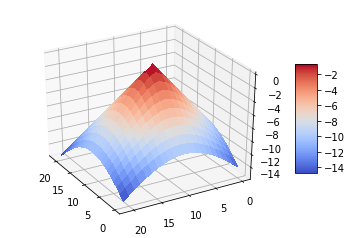

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatte



fig = plt.figure()
ax = fig.gca(projection='3d')

X = X_xorig
Y = X_yorig
# X, Y = np.meshgrid(X, Y)
# print X

X_move = X_xmove
Y_move = X_ymove

centre = [10,10]
total_move = np.sqrt((X_move - centre[0])*(X_move-centre[0]) + (Y_move -centre[1])*(Y_move-centre[1]))
total_orig = np.sqrt((X - centre[0])*(X-centre[0]) + (Y -centre[1])*(Y-centre[1]))

Z_move = (total_orig-total_move)
# print Z_move
Z_move_sign = np.sign(Z_move)
# print '****************'
# print Z_move_sign

# plt.subplot(121)
# plt.imshow(total_orig)
# plt.colorbar()

# plt.subplot(122)
# plt.imshow(total_move)
# plt.colorbar()


# Z_signx = np.sign(x_derivative)
# Z_signy = np.sign(y_derivative)
# Z_sign = Z_signx * Z_signy
# print Z_signx
Z = Z_move_sign * np.sqrt(x_derivative*x_derivative + y_derivative*y_derivative)
# Z = x_derivative *x_derivative

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(azim=150)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('saddle.png', bbox_inches='tight')
plt.show()

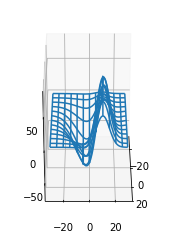

In [156]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.show()
    plt.pause(.001)

In [112]:
np.sqrt((0-10)**2 + (21-10)**2)
np.sqrt((10 -10)**2 + (11-10)**2)
# np.sqrt(())

1.0

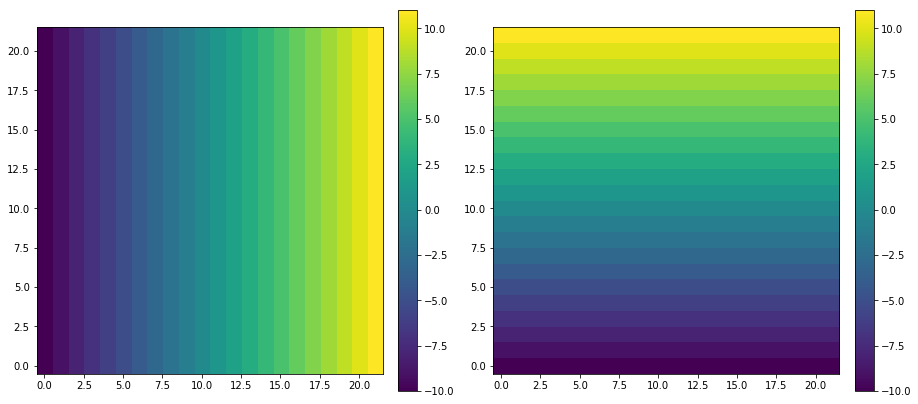

In [217]:
# from sklearn.cluster import KMeans
# X_dash_f = X_dash.flatten()
# X_dash_2d = X_dash_f.reshape(-1,2)
# print X_dash_2d.shape
# kmeans = KMeans(n_clusters=15, random_state=0).fit(X_dash_2d)
# clust_pred = kmeans.predict(X_dash_2d)
# clust_pred_flow = clust_pred.reshape(22,22)
# plt.imshow(clust_pred_flow)
# plt.gca().invert_yaxis()
# plt.colorbar(fraction=0.025, pad=0.04)
# xxx=np.ones((2,1))
# xxx = np.array([[20, 20]])
# bbb = np.array([[-20,20.07]])
# AAA = -np.linalg.pinv(xxx).dot(bbb)
# AAA

# eigg_vall , eigg_vecc = np.linalg.eig(AAA)
# print eigg_vall

fig = plt.figure(figsize=(15,8))


plt.subplot(1,2,1)
plt.imshow(x_derivative.T)
# plt.colorbar()
plt.colorbar(fraction=0.05, pad=0.04)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.imshow(y_derivative.T)
plt.colorbar(fraction=0.05, pad=0.04)
plt.gca().invert_yaxis()

In [15]:
def orientation_image(): 
    N_x = 22
    N_y = 22
    r_1 =np.zeros((N_x,N_y))
    r_2 = np.zeros((N_x,N_y))
    theta_1 = np.zeros((N_x,N_y))
    theta_sin = np.zeros((N_x,N_y))
    theta_cos = np.zeros((N_x,N_y))
     
    for i in range (0,N_x):
        for j in range (0,N_y):
            pos = np.array([i,j]).T
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
#     dom_theta= (np.arctan(np.sum(flow1[:,:,1])/np.sum(flow1[:,:,0])))
#     dom_r_1= r_1[N/2,N/2] * np.sum(np.linalg.norm(r_1*np.cos((dom_theta-theta_1))))/np.sum((r_1))
##     print dom_r_1
##     print dom_theta 
    
    return theta_1

(612, 370, 2)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

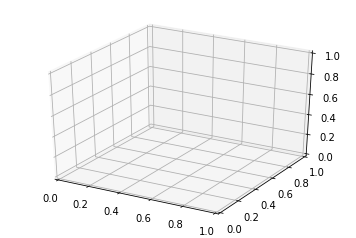

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatte



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0, 22, 1)
Y = np.arange(0, 22 , 1)
X, Y = np.meshgrid(X, Y)

flow1 = X_dash
# Z = np.sqrt(x_derivative*x_derivative + y_derivative*y_derivative)
Z = (orientation_image()* orientation_image())
# Z = x_derivative + y_derivative

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# for ii in xrange(0,360,1):
#     ax.view_init(elev=10., azim=ii)
#     plt.savefig("movie%d.png" % ii)
    
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [33]:
%%bash 
ffmpeg -r 30 -i movie%d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4

bash: line 1: ffmpeg: command not found


#### Sampling

In [16]:
xx=yy=0
step_N = 11
step_y = 11

X_dash_sect = X_dash[0+xx*step_N:step_N+xx*step_N,0+yy*step_N:step_N+yy*step_N,:] +0.00001
# X_dash_sect = dom_image



print (np.shape(X_dash_sect))
flow1= X_dash_sect

k = 0.17
orient = (orientation_image())
n= 3.14/0.17
orient = orient*180/3.14
orient =  (orient).astype(int)
# for x in orient:
#     x= [y+180 for y in x if y<0]
# [y+180 for y in orient[:,] if y<0]
for i in range(orient.shape[0]):
    for j in range (orient.shape[1]):
        if orient[i,j]<0:
            orient[i,j]+=180
# orient = orient*3.14/180
print np.min(orient)
print np.max(orient)
clust_full =[]
clust_image = np.zeros((step_x,step_y))
for i in range (int(n)):
    thet_start =  0.0 +i*10
    thet_end = thet_start + 10
    print  thet_start, thet_end
#     orient_loc_st = np.where(orient>70)
#     orient_loc_end = np.where(orient<80)
    clust_section = []
    for x in range(0,step_x):
        for y in range(step_y):
            if orient[x,y]>=thet_start and orient[x,y]<thet_end :
                clust_section.append((x,y))
                clust_image[x,y] = i
    clust_full.append(clust_section)
#     x_points = set(orient_loc_st).intersection(orient_loc_end)
# print orient_loc_st[0]
# print orient_loc_end[0]
# print x_points
print clust_section
plt.imshow(clust_image)
plt.colorbar()

(11, 11, 2)


IndexError: index 11 is out of bounds for axis 0 with size 11

#### K-Means 

In [17]:
np.set_printoptions(threshold=np.nan)
fig = plt.figure(figsize=(40,10))
xx=0
yy=0
# step_N = 22

# X_dash_sect = X_dash[0+xx*step_N:step_N+xx*step_N,0+yy*step_N:step_N+yy*step_N,:] +0.00001
flow1=X_dash_sect
# orient = (orientation_image())
# print orient
orient_1 = orient*3.14/180
# print (orient_1) 
orient_1d = orient_1.flatten()
print orient_1d.shape
X_dash_1d = orient_1d

# X_dash_1d = np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5.1,4.8,4,4,4])
X_dash_2d = X_dash_1d.reshape(step_x,step_y)
X_dash_1d_sh = X_dash_1d.reshape(-1,1)
print X_dash_1d_sh.shape

no_of_clust = 18
# kmeans = KMeans(n_clusters=no_of_clust, random_state=0).fit(X_dash_1d.reshape(-1,1))
# clust_pred = kmeans.predict(X_dash_1d_sh)
clust_pred = clust_image.flatten()
# clust_pred_2d = clust_pred.reshape(step_N,step_N)

clust_pred_2d = clust_image


plt.imshow(clust_pred_2d)
plt.gca().invert_yaxis()
plt.colorbar(fraction=0.025, pad=0.04)


# print clust_pred
clusts_uniq = np.unique(clust_pred)
print len(clusts_uniq)
para = [0,0]
omega = [] 
tans = []
mean_tans = []
e=[]
f=[]
mean_lms = []
for i,val in enumerate(clusts_uniq):
#     print i
    clusts_loc = np.where(clust_pred_2d==val)
    mean_tans.append(abs(np.min((orient_1[clusts_loc]))))
    check = (np.min((orient_1[clusts_loc])))
#     print 'c',check
    zeta_clust = np.tan(np.min((orient_1[clusts_loc])))
#     print zeta_clust
#     tans.append(np.tan(orient[clusts_loc]))
#     print clusts_loc
#     print clusts_loc[0]
    x_points = clusts_loc[0][np.newaxis].T
    y_points = clusts_loc[1][np.newaxis]
    
#     lms_val = lms(para,x_points,y_points.T) 
#     print lms_val
#     lms_opt = scipy.optimize.least_squares(lms,para,loss='soft_l1', f_scale=0.1,args=(x_points, y_points.T,zeta_clust))
    lms_opt = scipy.optimize.minimize(lms,para,args=(x_points, y_points.T,zeta_clust))



#     print lms_opt.fun
#     print lms_opt.x
    p= lms_opt.x 
#     print (p)
#     e.append(p[1])
#     f.append(p[2])
#     omega.append(lms_opt.x)
    ones_ar = np.ones((x_points.shape[0],1))
    x_points_ar = np.hstack((x_points,ones_ar))
#     p = np.linalg.pinv(x_points_ar).dot(y_points.T)
    if  True: #lms_opt.fun < 2 and ((check>0.1 and check<1.3) or (check>1.8 and check<2.9) or (check>3.3 and check<4.5)): 
        omega.append([np.cos(p[0]),np.sin(p[0]),p[1]])
        tans.append((orient_1[clusts_loc]))
        mean_lms.append(lms_opt.fun)
#         e.append(p[1])
#         f.append(p[2])
        print 'mean', lms_opt.fun
        print 'line'
#     print omega
#     p= lms_opt.x 
#     print p[0],p[1] 
#     print x_points.shape, y_points.shape, x_points_ar.shape 
        x_plot = np.arange(0,30)
        plt.plot(x_points, -(np.cos(p[0])*x_points + (p[1]) )/np.sin(p[0]))
#         plt.plot(x_plot, -(np.cos(p[0])*x_plot + (p[1]-p[2]*zeta_clust) )/np.sin(p[0]),'r')
#     plt.plot(x_plot,-(p[0]*x_plot+p[2])/p[1],'r')
# print x_points.shape, y_points.shape, tans
# print tans
# print np.max(mean_tans)
# print e,np.max(e), np.min(e), np.std(e)
# print f, np.max(f), np.min(f), np.std(f)
# print mean_lms
# print check
# print mean_tans

NameError: name 'orient' is not defined

### LMS

In [18]:
def lms(para,x,y,zet):
    return np.mean(np.square(np.cos(para[0])*x + np.sin(para[0])*y + (para[1]) ))
#     return 1/2 *np.sum((np.square(np.cos(para[0])*x + np.sin(para[0])*y + (para[1]) )))




#  return np.median(np.square(para[0]*x + para[1]*y + para[2])) # + 1*np.abs( np.square(para[0])+np.square(para[1])-1)))


#### Critical Point- LMS

In [81]:
import cma
print len(omega)
def crit_lms(crit_point):
    omega_1= np.array(omega).reshape(-1,3)
#     print omega_1[0]
    crit_point_1=np.array([crit_point[0],crit_point[1],1])
    mse =  np.square(omega_1.dot(crit_point_1)/np.sqrt((omega_1[:,0]*omega_1[:,0] + omega_1[:,1]*omega_1[:,1])))
    med_val =  np.median(np.square(omega_1.dot(crit_point_1)/np.sqrt(list(omega_1[:,0]*omega_1[:,0] + omega_1[:,1]*omega_1[:,1]))))
    print mse
    
    return med_val

# critt = crit_lms(crit_init)
# print critt

crit_init = [5,5]
# crit_opt= scipy.optimize.minimize(crit_lms,crit_init) #,args=(np.array(omega).flatten()))
# print crit_opt.x    

es = cma.CMAEvolutionStrategy(crit_init, 0.5, {'tolx' : 1e-3, 'tolfun': 1e-2})
# print mse
res_1 = es.optimize(crit_lms)
print res_1.result.xbest
    
    

18
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=85699, Mon Dec 17 04:20:19 2018)
[  32.53555536   24.32640304 1832.88473797 1796.37239592  685.19397804
 2028.6727894  1835.33761381 1633.87316499 1703.01011119 1595.21594033
 1453.14993592 1220.88930589 1304.05669988 1094.99925543  971.21403154
  817.19363594  586.17115551  290.62470023]
[  27.39048799   28.85243626 1827.30569992 1786.13996458  692.23344617
 1995.98566348 1800.60955346 1598.75213909 1674.29528284 1561.90480741
 1419.34114398 1188.50086503 1273.15402023 1064.41744666  941.89808995
  790.4876213   562.97905904  274.61293753]
[  24.31756527   32.77909396 1854.99188405 1810.62077662  713.69486712
 2001.77107942 1800.83324016 1594.73471215 1681.15124202 1560.52827912
 1414.08576699 1180.02590332 1270.45491722 1056.64478584  932.76039994
  782.75069047  552.35319642  265.26834379]
[  28.80176597   25.86480545 1759.2470005  1719.82935785  653.00650144
 1945.30600742 1760.02692578 1567.23604956 1625.85774789 1526.5665

[  1.50233396  13.82189284 216.15929407 185.17308815  11.77439362
 362.38146344 362.07857547 356.64364911 216.02000458 287.17980037
 306.97843683 294.90478599 196.19722209 228.21831739 223.10944776
 136.38872802 172.27303363 118.33044727]
[   6.6217352   121.52316976 3424.20184212 3340.53195113 1695.10219741
 3118.83589141 2686.78607773 2276.85437142 2765.5251099  2333.50881805
 2002.74419942 1572.89162482 1920.06255581 1440.25641955 1217.16788951
 1072.30370097  614.81233407  220.17178632]
[175.44523186 212.11204014   0.79238051  14.17293124  18.62238803
  10.95852666  11.24418049   9.86893297  56.83794747  28.5401016
  18.35285273  14.19550063  66.17473578  34.90663787  29.52702084
  80.12707656  24.60769582  20.9961745 ]
[1318.03470764 1420.47739964   16.19786309    2.36885279   87.37213268
  210.84118701  303.95550528  377.35690799  317.11225033  411.47979697
  454.74009239  515.63018948  572.25029697  611.12747764  635.54437406
  805.03760559  716.3173329   753.29872346]
[1.570677

[1.18452107e+02 2.37328295e+02 1.25547798e+03 1.27010937e+03
 1.96278183e+03 2.45941433e+02 9.87991955e+01 2.19711726e+01
 4.68865932e+02 1.00598193e+02 1.55406891e+01 3.23353630e+00
 1.18236746e+02 5.15593294e-01 7.45402201e+00 3.67139205e+00
 1.19339750e+02 3.09535405e+02]
[ 71.04470063 160.08403549 167.76518785 114.77128514  33.9227636
 125.91697015 107.56720812  93.31510437  51.53388949  64.9301723
  65.95119653  54.71665738  24.03994665  28.65341606  25.3424751
   3.33431305   9.60343567   1.16334788]
[1.49937058e+00 4.95365954e+01 1.60765263e+03 1.71902378e+03
 1.97615354e+03 6.70220660e+02 4.29013601e+02 2.48304294e+02
 1.00096985e+03 4.38299317e+02 2.27368232e+02 8.82453048e+01
 4.79151614e+02 1.41907235e+02 7.08674899e+01 1.71334154e+02
 4.27341951e-02 5.80081167e+01]
[156.54362904 207.83274791   3.80306435   0.67897037   4.54309534
   0.24688074   0.53563109   0.53118293  21.88748583   7.81299946
   3.83776885   2.9315302   32.14180508  14.6838298   12.44235415
  48.70471857 

[24.15653899 39.62017016  4.98812684 17.09217544 78.7392491   1.19668805
  4.19187429  9.08933313 11.99781395  0.12598759  4.53464043 10.78680777
  4.61471022  1.21336466  3.59082149  3.02553668  9.11012552 13.71772876]
[42.82904074 82.6118628  16.20643309  3.85752438  7.51814865 26.50595355
 28.51246342 31.37604492  0.65514175 11.46364116 19.7328809  23.15502992
  0.37064419  7.21986376  9.10233689  0.19349223  8.24350186  5.95272323]
[1.78611446e+01 2.78491004e+01 1.63522885e+01 3.44869727e+01
 1.15247094e+02 4.21033978e-03 1.59135973e+00 6.00012921e+00
 2.08280868e+01 1.21659540e-01 2.71838775e+00 9.26279955e+00
 7.65319505e+00 7.10901114e-01 3.15624071e+00 3.65286995e+00
 1.07408669e+01 1.83837012e+01]
[8.22864784e+00 1.43840384e+01 2.46004559e+01 4.40021381e+01
 1.46105587e+02 4.45731145e-02 2.67669414e+00 9.07280682e+00
 2.01521089e+01 9.55751909e-03 5.19498759e+00 1.48594904e+01
 5.05109100e+00 2.69554434e+00 7.14957624e+00 1.10456097e+00
 1.94775992e+01 3.13211653e+01]
[1.31528

[8.09917458e+01 1.25144756e+02 7.24881188e+00 1.12354408e-01
 8.46629930e+00 5.91820237e+00 6.22005864e+00 7.25712522e+00
 3.43662103e+00 2.61480763e-01 2.32054182e+00 3.59225681e+00
 5.23616172e+00 5.35825301e-02 1.44322692e-02 1.12017268e+01
 1.25508801e-02 1.10322385e-02]
[ 96.75956618 126.21675341   1.35056026  13.2268039   35.25886838
   1.63957831   0.88715889   0.19958078  31.77196993   7.94676889
   2.2332521    0.55854651  30.28464342   8.42665509   5.36640597
  34.51215751   2.65740834   1.38065779]
[4.20369390e+01 5.56250222e+01 1.58763324e+01 3.69496183e+01
 9.53838493e+01 1.89980620e+00 1.78830183e-01 3.46591797e-01
 3.51139220e+01 4.42346642e+00 7.30958020e-02 9.70014682e-01
 2.10517115e+01 1.45563085e+00 1.15028242e-01 1.60254427e+01
 1.08881735e+00 4.09767135e+00]
[5.77002113e+01 8.04751100e+01 2.97728834e+00 1.55183582e+01
 5.38820726e+01 6.84116273e-02 1.32570090e-01 1.16920581e+00
 2.21977186e+01 2.03456205e+00 1.21734931e-02 1.10536455e+00
 1.62037012e+01 1.24812539

[6.70533936e+01 9.61090842e+01 1.47692021e-01 7.08229741e+00
 3.51378129e+01 1.99235943e-01 7.80231534e-01 2.04735460e+00
 1.55871781e+01 9.41930736e-01 1.56149828e-01 1.33087048e+00
 1.32150126e+01 1.00325328e+00 1.78049022e-01 1.58111486e+01
 3.77479167e-02 2.76946622e-01]
[5.86554232e+01 8.28810556e+01 1.83317157e+00 1.27686959e+01
 4.88647382e+01 2.72860873e-06 3.42959532e-01 1.59647103e+00
 1.96821684e+01 1.48680598e+00 7.68072844e-02 1.37728812e+00
 1.46966310e+01 9.83420127e-01 1.10612283e-01 1.53443049e+01
 2.43459857e-01 1.00146607e+00]
[7.92125250e+01 1.13956895e+02 3.27259744e-01 3.18225438e+00
 2.30680235e+01 5.77867889e-01 1.06585796e+00 2.06526548e+00
 1.28484535e+01 7.66186339e-01 1.21144345e-01 9.20326352e-01
 1.29257808e+01 1.40506900e+00 4.75030862e-01 1.77401685e+01
 8.34052795e-02 1.72586221e-02]
[7.58997324e+01 1.10076563e+02 3.12527039e-01 3.15006517e+00
 2.39190898e+01 7.63537891e-01 1.36164059e+00 2.51871358e+00
 1.20952761e+01 5.39815357e-01 2.53171418e-01 1.27

 2.25867026e-02 2.88230433e-03]
[7.88715507e+01 1.12913006e+02 1.73306946e-01 3.75648583e+00
 2.44710823e+01 4.16219913e-01 8.72572007e-01 1.83537208e+00
 1.37210022e+01 9.36533803e-01 7.39830827e-02 8.12801270e-01
 1.35532401e+01 1.54877079e+00 5.43790225e-01 1.81843393e+01
 9.38945993e-02 1.47337914e-02]
[7.15029083e+01 1.03558518e+02 4.25622756e-02 4.40657064e+00
 2.81218050e+01 5.68340148e-01 1.22559024e+00 2.49458125e+00
 1.30746019e+01 6.00418769e-01 2.65284837e-01 1.42269147e+00
 1.20319098e+01 9.15106408e-01 1.79603610e-01 1.56839347e+01
 4.53094700e-03 8.58161510e-02]
[7.73830931e+01 1.11391799e+02 2.14031755e-01 3.54077252e+00
 2.44089546e+01 5.45798772e-01 1.06533155e+00 2.11660684e+00
 1.30489927e+01 7.54723297e-01 1.38727092e-01 1.00375428e+00
 1.28287181e+01 1.30898405e+00 4.06807193e-01 1.73417224e+01
 4.47978876e-02 1.16081816e-03]
[7.56045346e+01 1.08671052e+02 8.98527865e-02 4.13477711e+00
 2.62572705e+01 4.52184832e-01 9.83732322e-01 2.06609817e+00
 1.35899941e+01 8.

 6.88461470e-03 1.63094350e-02]
[7.51194369e+01 1.08284034e+02 1.16888492e-01 3.95128494e+00
 2.59968966e+01 5.26284355e-01 1.08945535e+00 2.21273032e+00
 1.32012745e+01 7.21013420e-01 1.70447965e-01 1.13038454e+00
 1.26307536e+01 1.17564460e+00 3.20736119e-01 1.67874848e+01
 1.23310235e-02 7.90522933e-03]
[7.50120433e+01 1.08121598e+02 1.10527210e-01 3.98615003e+00
 2.61067488e+01 5.21019689e-01 1.08507898e+00 2.21049475e+00
 1.32310815e+01 7.23719138e-01 1.70245024e-01 1.13284763e+00
 1.26383666e+01 1.17335452e+00 3.18635138e-01 1.67747567e+01
 1.14698239e-02 8.94422527e-03]
[7.50782155e+01 1.08199529e+02 1.10785572e-01 3.98638636e+00
 2.60874288e+01 5.17840300e-01 1.07958388e+00 2.20168317e+00
 1.32460775e+01 7.28438503e-01 1.67716373e-01 1.12574171e+00
 1.26589492e+01 1.18057086e+00 3.22549848e-01 1.68026949e+01
 1.22786219e-02 8.23766468e-03]
[7.58324198e+01 1.09321115e+02 1.55428696e-01 3.76359611e+00
 2.53642580e+01 5.49462512e-01 1.10320970e+00 2.20853830e+00
 1.30664532e+01 7.

[7.51928731e+01 1.08462389e+02 1.33073476e-01 3.86227176e+00
 2.57757327e+01 5.49720719e-01 1.11754096e+00 2.24532744e+00
 1.30800815e+01 7.00002285e-01 1.78769132e-01 1.14571779e+00
 1.25490628e+01 1.15967000e+00 3.14263442e-01 1.67352774e+01
 1.20700830e-02 7.39956792e-03]
[7.54612837e+01 1.08887199e+02 1.54358964e-01 3.75915493e+00
 2.54636232e+01 5.68883283e-01 1.13567150e+00 2.25960410e+00
 1.29784227e+01 6.88136000e-01 1.81591420e-01 1.14426440e+00
 1.25090143e+01 1.16050822e+00 3.17290345e-01 1.67501412e+01
 1.40753346e-02 5.20763563e-03]
[7.52636182e+01 1.08629628e+02 1.48774050e-01 3.78194680e+00
 2.55736804e+01 5.71364936e-01 1.14316463e+00 2.27477935e+00
 1.29708129e+01 6.81356712e-01 1.86386557e-01 1.15939664e+00
 1.24758956e+01 1.14558684e+00 3.08629522e-01 1.66892675e+01
 1.18796045e-02 6.91724700e-03]
[7.56057664e+01 1.09127809e+02 1.68831128e-01 3.69307673e+00
 2.52711153e+01 5.82949253e-01 1.14998989e+00 2.27282865e+00
 1.29062924e+01 6.78488316e-01 1.84599026e-01 1.14

In [191]:
omega_2= np.array(omega).reshape(-1,3)
include = [2,3,4,5]
omega_3 = omega_2[include,:]
omega = omega_3

tans_1 = np.array(tans)
tans_2 = tans_1[include]
tans = tans_2

#### Companion Matrix

In [192]:
# print omega

# print orient
# print len(tans)
# tans_2d=
zeta = np.zeros((1,len(tans)))
mu = np.zeros((1,len(tans)))
for i in range(0,len(tans)):
    mu[0,i] = omega[i][0]/(omega[i][1])
    zeta[0,i] = np.tan(np.mean(tans[i]))
# print zeta
# print mu

one_vec = np.ones((len(tans),1))
omega_vec_stack = np.hstack((one_vec,np.hstack((-mu.T,np.hstack((-zeta.T, mu.T*zeta.T))))))
omega_mat = omega_vec_stack
print omega_mat
# print omega[0][:]

psi_1 = -1*(omega_mat.T.dot(omega_mat))
print 'psi',psi_1
psi = (psi_1 +psi_1.T)/2.

L_eig_val, L_eig_vec = np.linalg.eig(psi)
max_ind = np.argmax(L_eig_val)
print (L_eig_val[max_ind]), L_eig_val
print L_eig_vec[max_ind]
print L_eig_vec[max_ind].T.dot(L_eig_vec[max_ind])

# L_eig_val, L_eig_vec = np.linalg.eig(psi)
# max_ind = np.argmax(L_eig_val)
# print (L_eig_val[max_ind]), L_eig_val
# print L_eig_vec[max_ind]
# print L_eig_vec[max_ind].T.dot(L_eig_vec[max_ind])

L_final = L_eig_vec[max_ind].reshape(2,2)

print L_final.shape

temp = L_final[0]
temp_1 = L_final[1]
# print temp,temp_1
L_final_1 = np.array([[temp_1[0],temp_1[1]],[temp[0],temp[1]]])
print L_final_1.shape


# L_final_1 = [[0.64,0.05],[0.05,0.76]]
L_eig_val_f,L_eig_vec_f = np.linalg.eig(L_final_1)
print 'eig',L_eig_val_f

m = Matrix(L_final_1)
P, J = m.jordan_form()
print J

[[1.         0.46542673 2.19695614 1.02252211]
 [1.         0.57273376 1.49458902 0.85600159]
 [1.         0.84728929 1.04870621 0.88855754]
 [1.         1.427695   0.75358422 1.07588843]]
psi [[-4.         -3.31314479 -5.4938356  -3.84296967]
 [-3.31314479 -3.30085817 -3.84296967 -3.25507596]
 [-5.4938356  -3.84296967 -8.72808653 -5.26841517]
 [-3.84296967 -3.25507596 -5.26841517 -3.72536061]]
-0.00025249592484203557 [-1.82445576e+01 -1.47783740e+00 -3.16578609e-02 -2.52495925e-04]
[-0.44835963 -0.19612781 -0.14768368  0.85947487]
1.0000000000000062
(2, 2)
(2, 2)
eig [-0.17190574+0.620296j -0.17190574-0.620296j]
Matrix([[-0.171905744140947 - 0.620295999407602*I, 0], [0, -0.171905744140947 + 0.620295999407602*I]])


#### Manual entry for 3x3

In [54]:
# flow_man  = np.array([[[0.0000001, 0.00000001],[0.0000001,-0.2],[0.000000001,-0.2]],[[-0.2,0.0000001], \
#                                                                [-0.2, -0.2], [-0.1, -0.4]],[[ -0.2,0.000000001],[-0.4, -0.1],[-0.2, -0.2]]])
# flow_man = X_dash[-10:0,-10:0,:] +0.00001
# flow_man

#### Dominant Orientation

In [102]:
def dominant_orientation(): 
    N =5
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
     
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
    dom_theta= (np.arctan(np.sum(flow1[:,:,1])/np.sum(flow1[:,:,0])))
    dom_r_1= r_1[N/2,N/2] * np.sum(np.linalg.norm(r_1*np.cos((dom_theta-theta_1))))/np.sum((r_1))
#     print dom_r_1
#     print dom_theta 
    
    return dom_r_1,dom_theta

#### Classifying Section of Phase Portrait

In [103]:
## Different Quadrants
# flow_man = X_dash[0:11,-11:,:] +0.00001
# flow_man = X_dash[0:11,0:11,:] +0.00001
#flow_man = X_dash[-11:,0:11,:] +0.00001
#flow_man = X_dash[-11:,-11:,:] +0.00001

# a[0:11,0:11] = a[0:11,0:11]*2
# a[0:11,-11:] = a[0:11,-11:]*1
# a[-11:,0:11] = a[-11:,0:11]*3
# a[-11:,-11:] = a[-11:,-11:]*4

# flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
# print flow1
# fig =plt.figure(figsize=(20,10))
plt_id =0
w_size = 11
# fixed_map = np.zeros((22,22))

# n_windows= (N*2)/w_size
domin_r_1 = []
domin_theta_1 =[]

flow_x = np.shape(X_dash)[0]
flow_y = np.shape(X_dash)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
print n_windows_x
print n_windows_y

dom_image = np.zeros((n_windows_x,n_windows_y,2))

for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
#         xx=1
#         yy =1
        if w_size+xx*w_size>flow_x or w_size+yy*w_size > flow_y:
            print 'hit limit'
            break
        else:
            flow_man = X_dash[0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size,:] +0.00001
            flow1 = flow_man
            plt_id+=1
#             plt.subplot(n_windows_x,n_windows_y,plt_id)
            dr,dt1  = dominant_orientation()
            domin_r_1.append(dr)
            domin_theta_1.append(dt1)
#             dom_image[xx,yy,0] = dr*np.cos(dt1)
#             dom_image[xx,yy,1] = dr*np.sin(dt1)
            
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,0] = (dr*np.cos(dt1))
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,1] = (dr*np.sin((dt1)))
            dom_image[xx,yy,0] = flow_man[w_size/2,w_size/2,0]
            dom_image[xx,yy,1] = flow_man[w_size/2,w_size/2,1]
#             print xx,yy
#             for x in range(0,w_size):
#                 for y in range(0,w_size):
#                     if x==w_size/2 and y==w_size/2:
#                         plt.plot([x,x+flow_man[x,y,0]/1],[y,y+flow_man[x,y,1]/1],'r-')
#                     else:
#                         plt.plot([x,x+flow_man[x,y,0]/16],[y,y+flow_man[x,y,1]/16],'g-')
# plt.show()
# flow1

122
74


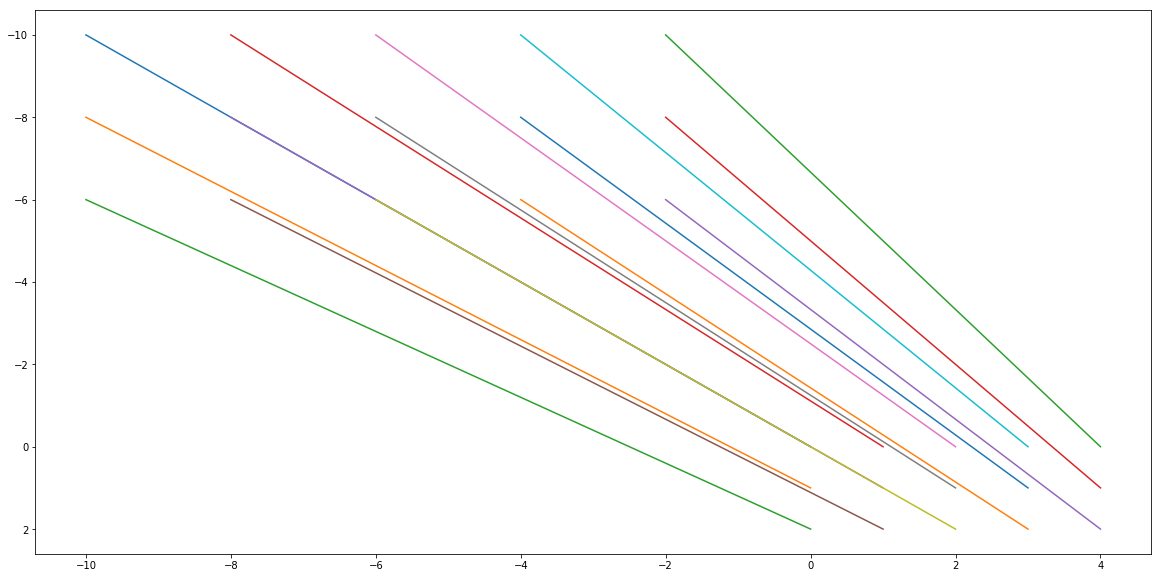

In [60]:
#Comment when with video
# dom_image = X_dash


fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x):
    for y in range(0,n_windows_y):
        plt.plot([x,x+dom_image[x,y,0]/1],[y,y+dom_image[x,y,1]/1],'-')
plt.gca().invert_yaxis()

# centre_x = 49
# centre_y = 17
# plt.plot(centre_x,centre_y,'o',markersize=12,label='Predicted Critical Point')
# plt.legend()

# plt.savefig('flow_mag.png', bbox_inches='tight')
plt.show()

In [41]:
print np.shape(dom_image)

(55, 33, 2)


0.10700268298387527


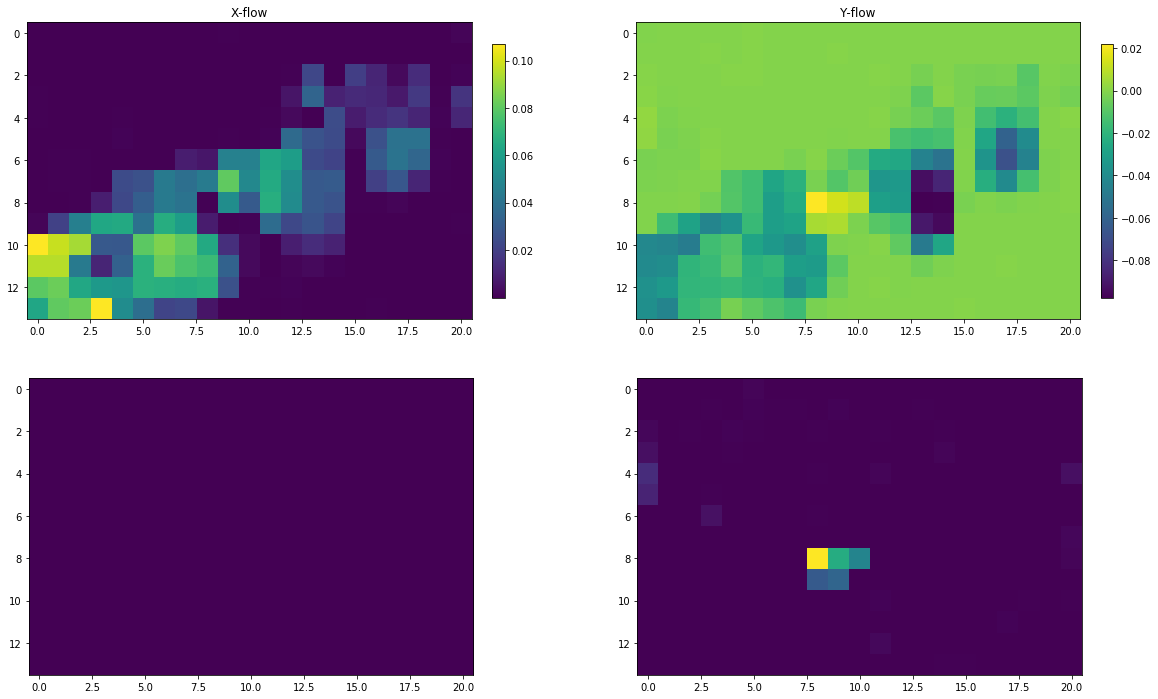

In [7]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.imshow(dom_image[:,:,0].T)
plt.title('X-flow')
plt.colorbar(fraction=0.025, pad=0.04)

plt.subplot(2,2,2)
plt.title('Y-flow')
plt.imshow(dom_image[:,:,1].T)
plt.colorbar(fraction=0.025, pad=0.04)
print np.max(dom_image[:,:,0])
dom_image_x= dom_image[:,:,0]
dom_image_xclip = dom_image_x.clip(min=2.)
plt.subplot(2,2,3)
plt.imshow(dom_image_xclip.T)
dom_image_y= dom_image[:,:,1]
dom_image_yclip = dom_image_y.clip(min=0.)
plt.subplot(2,2,4)
plt.imshow(dom_image_yclip.T)

# print np.shape(np.array(domin_r_1).reshape(56,34))


0.11485061834303809


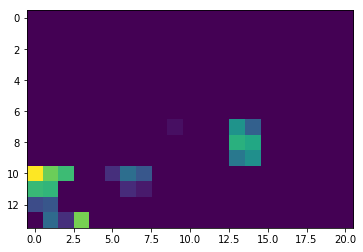

In [8]:
domin_plot = np.array(domin_r_1).reshape(21,14)
print np.max(domin_plot)
domin_plot_clip = domin_plot.clip(min=0.08)
plt.imshow(domin_plot_clip.T)

#### Smoothening Further

In [ ]:
# def dominant_orientation_final(flow): 
#     N =11
#     r_1 =np.zeros((N,N))
#     r_2 = np.zeros((N,N))
#     theta_1 = np.zeros((N,N))
#     theta_sin = np.zeros((N,N))
#     theta_cos = np.zeros((N,N))
     
#     for i in range (0,N):
#         for j in range (0,N):
#             pos = np.array([i,j]).T
#             r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
#             theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
#             theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
#             theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
#     dom_theta= (np.arctan(np.sum(flow1[:,:,1])/np.sum(flow1[:,:,0])))
#     dom_r_1= r_1[N/2,N/2] * np.sum(np.linalg.norm(r_1*np.cos((dom_theta-theta_1))))/np.sum((r_1))
# #     print dom_r_1
# #     print dom_theta 
    
#     return dom_r_1,dom_theta


In [7]:
## Different Quadrants
# flow_man = X_dash[0:11,-11:,:] +0.00001
# flow_man = X_dash[0:11,0:11,:] +0.00001
#flow_man = X_dash[-11:,0:11,:] +0.00001
#flow_man = X_dash[-11:,-11:,:] +0.00001

# a[0:11,0:11] = a[0:11,0:11]*2
# a[0:11,-11:] = a[0:11,-11:]*1
# a[-11:,0:11] = a[-11:,0:11]*3
# a[-11:,-11:] = a[-11:,-11:]*4

# flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
# print flow1
# fig =plt.figure(figsize=(20,10))

# dom_image = X_dash
print np.shape(dom_image)
plt_id =0
w_size = 11
# fixed_map = np.zeros((22,22))
dom_image = dom_image*10
# n_windows= (N*2)/w_size
domin_r_1 = []
domin_theta_1 =[]

flow_x = np.shape(dom_image)[0]
flow_y = np.shape(dom_image)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
print n_windows_x
print n_windows_y

dom_image_final = np.zeros((n_windows_x,n_windows_y,2))

for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
#         xx=1
#         yy =1
        if 11+xx*11>flow_x or 11+yy*11 > flow_y:
            print 'hit limit'
            break
        else:
            flow_man = dom_image[0+xx*11:11+xx*11,0+yy*11:11+yy*11,:] +0.00001
            flow1 = flow_man
            plt_id+=1
#             plt.subplot(n_windows_x,n_windows_y,plt_id)
            dr,dt1  = dominant_orientation()
            domin_r_1.append(dr)
            domin_theta_1.append(dt1)
#             dom_image[xx,yy,0] = dr*np.cos(dt1)
#             dom_image[xx,yy,1] = dr*np.sin(dt1)
            
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,0] = (dr*np.cos(dt1))
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,1] = (dr*np.sin((dt1)))
            dom_image_final[xx,yy,0] = flow_man[w_size/2,w_size/2,0]
            dom_image_final[xx,yy,1] = flow_man[w_size/2,w_size/2,1]
            print xx,yy
#             for x in range(0,w_size):
#                 for y in range(0,w_size):
#                     if x==w_size/2 and y==w_size/2:
#                         plt.plot([x,x+flow_man[x,y,0]/1],[y,y+flow_man[x,y,1]/1],'r-')
#                     else:
#                         plt.plot([x,x+flow_man[x,y,0]/16],[y,y+flow_man[x,y,1]/16],'g-')
# plt.show()
# flow1




(56, 34, 2)
5
3
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2


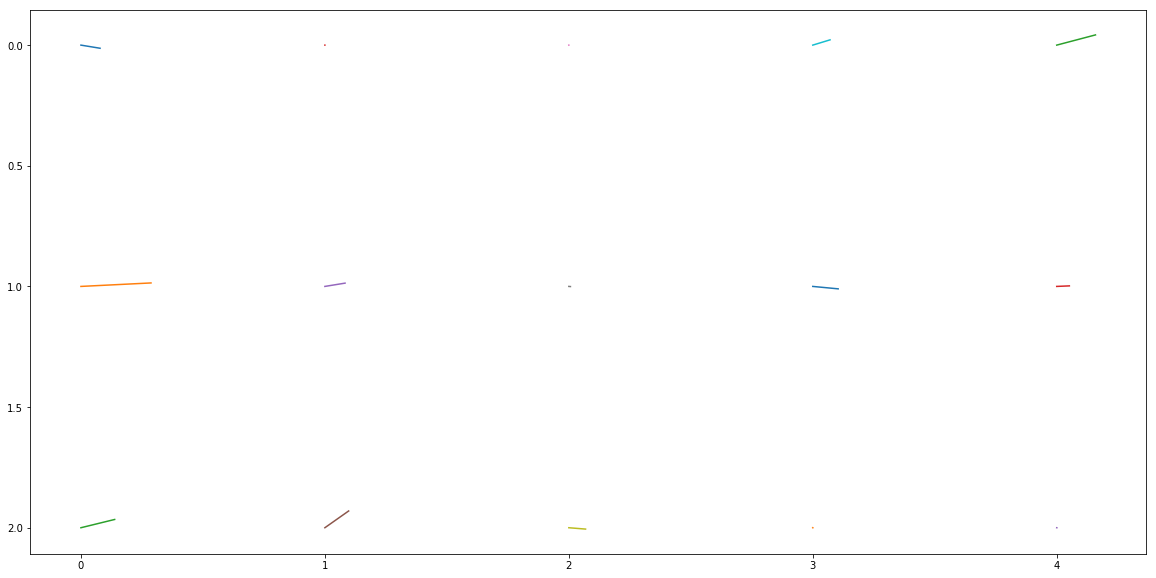

In [8]:
fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x):
    for y in range(0,n_windows_y):
        plt.plot([x,x+dom_image_final[x,y,0]/3],[y,y+dom_image_final[x,y,1]/3],'-')
plt.gca().invert_yaxis()

# centre_x = 49
# centre_y = 17
# plt.plot(centre_x,centre_y,'o',markersize=12,label='Predicted Critical Point')
# plt.legend()

plt.savefig('flow_mag_1_15.png', bbox_inches='tight')

plt.show()

In [69]:
def sum_of_areas_final(x0_in): 
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])
    N1 =np.shape(dom_image_final)[0]
    N2 =np.shape(dom_image_final)[1]
    
    A_12 =  np.zeros((N1,N2))
    r_1 =np.zeros((N1,N2))
    r_2 = np.zeros((N1,N2))
    theta_1 = np.zeros((N1,N2))
    theta_2 = np.zeros((N1,N2))
    theta_sin = np.zeros((N1,N2))
    theta_cos = np.zeros((N1,N2))
    
    
#     N=11
      
    for i in range (0,N1):
        for j in range (0,N2):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(dom_image_final[i][j][0]**2+dom_image_final[i][j][1]**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2) #np.sqrt(flow1[0][0][0]**2+flow1[0][0][1]**2)
            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(dom_image_final[i][j][1]/dom_image_final[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
            
            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))
    S = np.sum(A_12)
    #print S
#     print A_12
    dom_theta = (np.arctan(np.sum(theta_sin)/np.sum(theta_cos))/2)
    dom_r_1=(r_1[N1/2,N2/2]*np.sum(abs(r_1*np.cos(dom_theta-theta_1)))/np.sum(r_1))
#     print dom_r_1
#     print dom_theta
    #S= x0_in**2
    print r_1
    print theta_1
    return S
    #theta_1[0,0]

node=1
saddle=2
star=3
improper=4
center=5
spiral=6
x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
res_1 = least_squares(sum_of_areas_final, x0_sum_of_area,ftol=1e-3)
A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
A_eig,v  = np.linalg.eig(A_final)
print A_eig
print b_final
x_zero = -np.linalg.pinv(A_final).dot(b_final)
print 'zero:',x_zero

m = Matrix(A_final)
P, J = m.jordan_form()

root1 = A_eig[0]
root2 = A_eig[1]
l_1 = J[0,0]
l_2 = J[1,1]
imp = J[0,1]
print l_1,l_2
fit_map = np.zeros((np.shape(dom_image_final)[0],np.shape(dom_image_final)[1]))
if isinstance(root1,complex):
            alpha = root1.real
            if abs(alpha)<1e-2:
                phase= 'center'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= center
            else:
                phase = 'spiral'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= spiral
elif ((abs(l_1) - abs(l_2))<= 1e-1 ): #and np.sign(l_1)==np.sign(l_2) ):
    if (1-imp)<0.1:
        phase = 'imroper'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= improper
    else:
        phase = 'star'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11] = star
#                 print fit_map

elif(abs(abs(l_1)-abs(l_2))>1e-3):
    if (np.sign(l_1)==np.sign(l_2)):
        phase = 'node'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= node
    else:
        phase = 'saddle'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
elif np.sign(l_1)!= np.sign(l_2):
    phase = 'saddle'
    fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
else:
    phase = 'none'


print phase




NameError: global name 'dom_image_final' is not defined

#### Target function to be minimized

In [75]:

def sum_of_areas(x0_in): 
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])
    N =11
    A_12 =  np.zeros((N,N))
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_2 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
    
    
    
      
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2) #np.sqrt(flow1[0][0][0]**2+flow1[0][0][1]**2)
            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
            
            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))
    S = np.sum(A_12)
    #print S
    dom_theta = (np.arctan(np.sum(theta_sin)/np.sum(theta_cos))/2)
    dom_r_1=(r_1[N/2,N/2]*np.sum(abs(r_1*np.cos(dom_theta-theta_1)))/np.sum(r_1))
#     print dom_r_1
#     print dom_theta
    #S= x0_in**2
    return S
    #theta_1[0,0]









#### Finding  Eigen Values  and Fixed points by panning window across Image

In [76]:
node=1
saddle=2
star=3
improper=4
center=5
spiral=6

# root1 = A_eig[0]
# root2 = A_eig[1]
# l_1 = J[0,0]
# l_2 = J[1,1]
# imp = J[0,1]

dom_image = X_dash
domin_r_1 = []
domin_theta_1 =[]
flow_x = np.shape(dom_image)[0]
flow_y = np.shape(dom_image)[1]
w_size = 11

n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
fit_map = np.zeros((flow_x,flow_y))

N=w_size

# from scipy.optimize import least_squares
fit = np.zeros((n_windows_x,n_windows_y))
x_zerolist = [] #np.zeros((2,2))
fixed_map = np.zeros((flow_x,flow_y))
wind_no = 0
import time
start = time.clock()
for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
        wind_no+=1
        print wind_no
        flow_man = dom_image[0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size,:] +0.00001
        flow1 = flow_man
#         x0_dummy = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
#         dr,dt1  = dominant_orientation()
#         domin_r_1.append(dr)
#         domin_theta_1.append(dt1)
        
        x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
        
        res_1 = least_squares(sum_of_areas, x0_sum_of_area) #,ftol=1e-8)
        
        res_1.x
        A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
        b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
        A_eig,v  = np.linalg.eig(A_final)
        A_eig
        b_final
        x_zero = -np.linalg.pinv(A_final).dot(b_final)
        m = Matrix(A_final)
        P, J = m.jordan_form()
        root1 = A_eig[0]
        root2 = A_eig[1]
        l_1 = J[0,0]
        l_2 = J[1,1]
        imp = J[0,1]
        print l_1,l_2
        if isinstance(root1,complex):
            alpha = root1.real
            if abs(alpha)<1e-2:
                phase= 'center'
               
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= center
            else:
                phase = 'spiral'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= spiral
        elif ((abs(l_1) - abs(l_2))<= 1e-1 ): #and np.sign(l_1)==np.sign(l_2) ):
            if (1-imp)<0.1:
                phase = 'imroper'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= improper
            else:
                phase = 'star'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size] = star
#                 print fit_map

        elif(abs(abs(l_1)-abs(l_2))>1e-3):
            if (np.sign(l_1)==np.sign(l_2)):
                phase = 'node'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= node
            else:
                phase = 'saddle'
                fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= saddle
        elif np.sign(l_1)!= np.sign(l_2):
            phase = 'saddle'
            fit_map[ 0+xx*w_size:w_size+xx*w_size,0+yy*w_size:w_size+yy*w_size]= saddle
        else:
            phase = 'none'
        
        #Calculating Fitness(closeness between predicted and actual)
        fit[xx,yy]=1 - sum_of_areas(res_1.x)/(w_size**2/2)
        
        x_zero1 = (np.around(x_zero))
        x_zero1 = x_zero1.astype(int)
        if x_zero1[0]+xx*w_size>N*2 or x_zero1[0]+xx*w_size <0 or x_zero1[1]+yy*w_size> N*2 or x_zero1[1]+yy*w_size<0:
#             x_zero_1[0] = 0
#             x_zero1[1] = 0
#             fixed_map[x_zero1[0]+xx*11,x_zero1[1]+yy*11]= fit[xx,yy]
            print phase
            pass
        else:
            x_zerolist.append(x_zero1)
            print phase,fit[xx,yy],x_zero1, A_eig
            fixed_map[x_zero1[0]+xx*w_size,x_zero1[1]+yy*w_size]= fit[xx,yy]
        

# print np.shape(x_zero1)
print time.clock()- start

1
0.0129874828720815 -0.00311036896436967
star
2
0.0049021136014842 - 0.00073870096457142*I 0.0049021136014842 + 0.00073870096457142*I
center 0.9486862346971049 [[15]
 [-5]] [0.00490211+0.0007387j 0.00490211-0.0007387j]
3
0.0512875970432096 - 0.0116843281681708*I 0.0512875970432096 + 0.0116843281681708*I
spiral 0.5515918684134362 [[2]
 [6]] [0.0512876+0.01168433j 0.0512876-0.01168433j]
4
0.486748054280331 0.580845737116938
star 0.476456550583538 [[0]
 [0]] [0.58084574 0.48674805]
85.032333


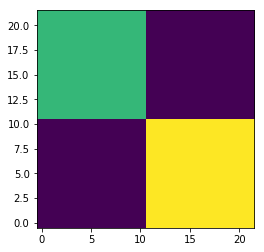

In [77]:
plt.imshow(fit_map.T)
plt.gca().invert_yaxis()

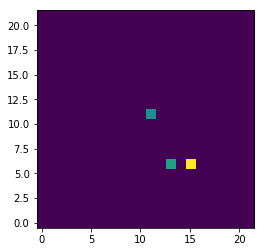

In [79]:
plt.imshow(fixed_map.T)
plt.gca().invert_yaxis()

#### Segmenting Image by type of flow:

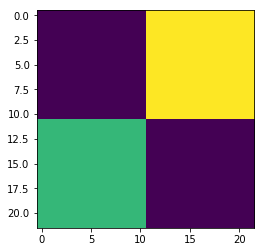

In [80]:
# fit_map[0:11,0:11]=2
# fit_map[11:22,11:22]=6
# fit_map[0:11,11:22]=6
# fit_map[11:22,0:11] = 2
np.set_printoptions(threshold=np.nan)
fit_map=fit_map.T
# print fit_map
plt.imshow(fit_map) #,origin='lower')

#### Visulaizing Fixed Points with likelihood values(proportional to the fit)

Text(0.5,1,u'Fixed Point Map')

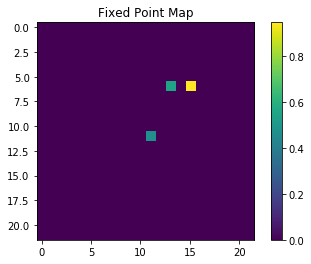

In [81]:
fixed_map =fixed_map.T
# fixed_map = np.around(fixed_map)
# fixed_map = fixed_map.clip(min=0)
# plt.scatter(x,y,s= fixed_map,alpha =0.5)
plt.imshow(fixed_map)#,origin='lower')
plt.colorbar(orientation='vertical')
plt.title('Fixed Point Map')
# print fixed_map




#### Critical points

In [33]:
# fixed_map_1 = fixed_map.clip(min=0)
# fixed_map_1 = np.around(fixed_map_1)
# indx = np.nonzero(fixed_map_1)
# print indx
# x_fin,y_fin = sum(indx[0])/len(indx[0]), sum(indx[1])/len(indx[1])
# # x_fin,y_fin = sum(indx)/len(indx)
# fixed_map_1[x_fin,y_fin] = 0.
# print x_fin,y_fin
# plt.plot(y_fin,x_fin,'*',label = 'Centroid')

# plt.imshow(fixed_map_1,origin='lower')
# plt.colorbar(orientation='vertical')
# plt.title('Fixed Point Map')
# plt.legend()

#### Taking Centroids of Critical/Fixed points within regions of similar flow

In [82]:
#preprocessing - run once
# fixed_map = fixed_map.T
fit_map_1= fit_map
fit_map_gray = fit_map_1 * 40

(array([ 6,  6, 11]), array([13, 15, 11]))


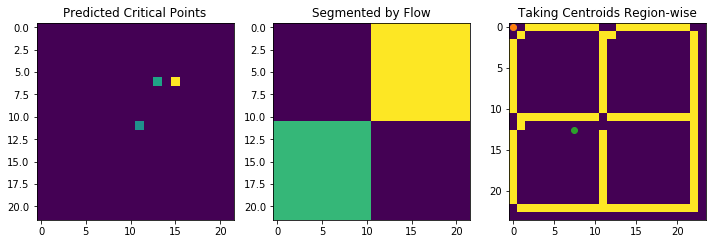

In [83]:
fig = plt.figure(figsize=(12,8))
# print indx   

img = cv2.imread('first.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fixed_map_1 = fixed_map.clip(min=0.)
# fixed_map_1 = np.around(fixed_map_1)
indx = np.nonzero(fixed_map_1)
print indx
plt.subplot(1,3,1)
plt.imshow(fixed_map_1) #,origin='lower')
plt.title('Predicted Critical Points')

plt.subplot(1,3,2)
plt.title('Segmented by Flow')
plt.imshow(fit_map) #,origin='lower')


fit_map_1= fit_map
plt.subplot(1,3,3)
fit_map_gray_Copy = np.uint8(fit_map_gray)
plt.title('Taking Centroids Region-wise')

fit_map_gray_Copy = np.pad(fit_map_gray_Copy, pad_width=1, mode='constant', constant_values=0)
edged = cv2.Canny(fit_map_gray_Copy, 90, 115)
edged1=edged

imagecnt,contours,hierarchy= cv2.findContours(edged1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(imagecnt) #,origin='lower')
centroid_x=np.zeros((len(contours)-1,1))
centroid_y = np.zeros((len(contours)-1,1))
no_contours = np.arange(len(contours))
covered =[]


for i in (reversed(no_contours)):
    if i > 0:
        cnt = contours[i]
        counts = 0.1
        for j in range (len(indx[0])):
            if j not in covered:
                test = cv2.pointPolygonTest(cnt,(indx[0][j],indx[1][j]),False)

                if test >= 0 :
                    
#                     print 'coveredd!',indx[0][j],indx[1][j]
                    covered.append(j)
                    counts+=1

                    centroid_x[-i],centroid_y[-i]= indx[0][j]+centroid_x[-i] , indx[1][j]+centroid_y[-i] 
                elif test == 0:
                    pass
                    print 'on border!'
#         print centroid_x,centroid_y[0]
        centroid_x[-i], centroid_y[-i] = centroid_x[-i]/counts,centroid_y[-i]/counts

        plt.plot(centroid_x[-i],centroid_y[-i],'o')

       
        

#### Visualizing Critical Points

2 2


Text(0.5,1,u'Multiple Critical Points')

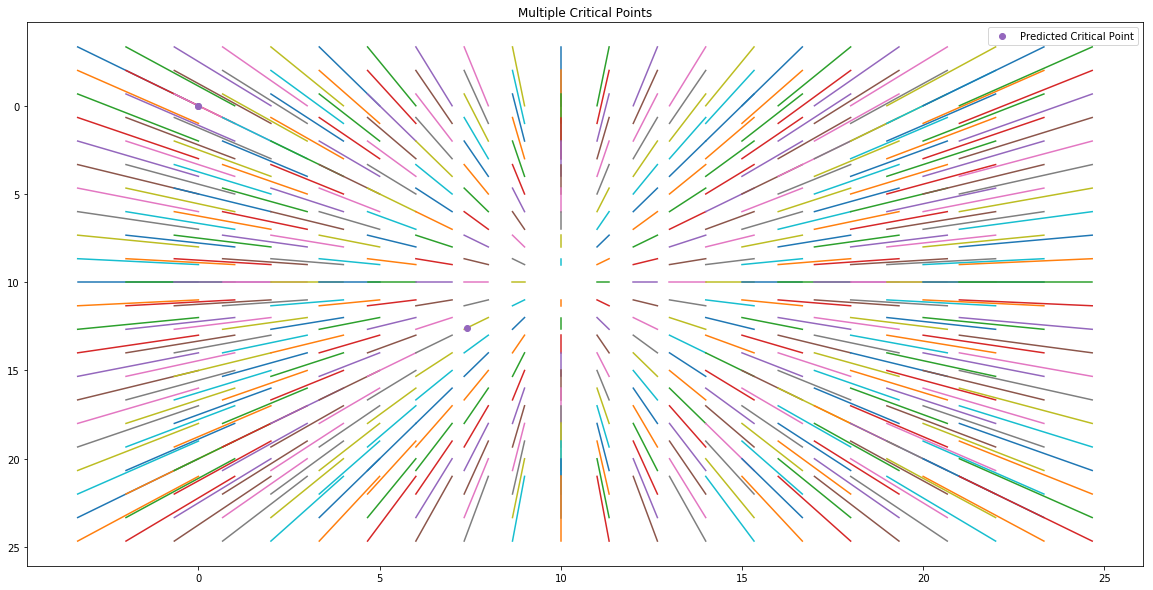

In [84]:
# fig = plt.figure(figsize=(20,10))

# for x in range(0,flow_x):
#     for y in range(0,flow_y):
#         plt.plot([x,x+X_dash[x,y,0]/15],[y,y+X_dash[x,y,1]/15],'-')
print n_windows_x,n_windows_y
fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x*w_size):
    for y in range(0,n_windows_y*w_size):
        plt.plot([x,x+dom_image[x,y,0]/3],[y,y+dom_image[x,y,1]/3],'-')
plt.gca().invert_yaxis()
# plt.show()
plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
plt.legend()
plt.title('Multiple Critical Points')

#### Reading Image Sequence

In [2]:
#####################################################################

# Example : perform live visualization of optic flow from a video file
# specified on the command line (e.g. python FILE.py video_file) or from
# an attached web camera

# Author : Toby Breckon, toby.breckon@durham.ac.uk

# Copyright (c) 2017 School of Engineering & Computing Science,
#                    Durham University, UK
# License : LGPL - http://www.gnu.org/licenses/lgpl.html

#####################################################################

import cv2
import sys
import numpy as np
#np.set_printoptions(threshold=np.nan)
#####################################################################

keep_processing = True;
camera_to_use = 0; # 0 if you have one camera, 1 or > 1 otherwise

#####################################################################

# draw optic flow visualization on image using a given step size for
# the line glyphs that show the flow vectors on the image

def draw_flow(img, flow, step=4):
    h, w = img.shape[:2]
    #print img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    #print np.shape(flow), np.shape(x), step
    fx, fy = flow[y,x].T
    print np.shape(fy)
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    #print lines[0][0][0]
#     print (np.shape(fx),np.shape(fy))

#     vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    vis = img
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
#         cv2.circle(vis, (240,320),5,(255,0,0),-1)
    return vis
#     cv2.circle(vis, (200,80),1,(255,0,0),-1)

#####################################################################

# define video capture object

# cap = cv2.VideoCapture();
# cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/18/images/%1d.jpg")


# define display window name


windowName = "Dense Optic Flow"; # window name
averageName = 'average'

# if command line arguments are provided try to read video_name
# otherwise default to capture from attached H/W camera
frame_count = 0
frame_avg_count = 0

opt_flow_list =[]
if True :#(((len(sys.argv) == 2) and (cap.open(str(sys.argv[1]))))
#     or (cap.open(camera_to_use))):
#     


#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/16/images/%1d.jpg")
#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test002/%3d.tif")
#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/training/image_02/0020_overtake/%1d.png")
#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/training/QMUL/qmul_junction.avi")
#     cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/training/image_02/0015_ppl_cross/%1d.png")
    f = 500
#     CV_CAP_PROP_POS_FRAMES
#     cv2.VideoCapture.set(cv2.CAP_PROP_POS_FRAMES, f)
    
    cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/training/UMN/Crowd-Activity-All .avi")
    cap.set(1, f)
#     cap.open('0020.avi')CV_CAP_PROP_POS_AVI_RATIO
    # create window by name (as resizable)

    cv2.namedWindow(windowName, cv2.WINDOW_NORMAL);

    # if video file successfully open then read an initial frame from video

    if (cap.isOpened):
        
        ret, frame = cap.read();

    # convert image to grayscale to be previous frame
    prevgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    while (keep_processing) and frame_count < 500:

        # if video file successfully open then read frame from video

        if (cap.isOpened):
            ret, frame = cap.read();

            # when we reach the end of the video (file) exit cleanly

            if (ret == 0):
                keep_processing = False;
                continue;

        # convert image to grayscale

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # compute dense optic flow using technique of Farneback 2003
        # parameters from example (OpenCV 3.2):
        # https://github.com/opencv/opencv/blob/master/samples/python/opt_flow.py

        flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        opt_flow_list.append(flow)
        
        frame_count+=1
        print frame_count
        
        if frame_count%(30*1) == (1*1) :
            print 'starting'
            frame_avg_count =1
            cv2.imshow(windowName, frame)
            cv2.waitKey()
#             seq_count = frame_count
            flow1=flow
#             frame_count+=1
#             frame_count+=0
        elif frame_avg_count>0 and frame_avg_count <31:
            frame_avg_count +=1
            print 'avg', frame_avg_count
#             frame_count+=1
            flow1+=flow
            if frame_avg_count==30:
                print 'ending'
                flow=flow1/30.
                frame_avg_count=0
                cv2.imshow(windowName, draw_flow(frame, flow1))
                cv2.waitKey()
                cv2.destroyAllWindows()
                keep_processing = False
                

                
#             flow1= flow
        
        
        #print flow
        prevgray = gray

        # display image with optic flow overlay
        
#         cv2.imshow(windowName, draw_flow(frame, flow))
#         prevgray = cv2.Circle(prevgray, (200,80), 1, (255,0,0), thickness=1, lineType=8, shift=0) 
#         cv2.imshow(windowName, prevgray)
        
    
        # start the event loop - essential
        
        # cv2.waitKey() is a keyboard binding function (argument is the time in milliseconds).
        # It waits for specified milliseconds for any keyboard event.
        # If you press any key in that time, the program continues.
        # If 0 is passed, it waits indefinitely for a key stroke.
        # (bitwise and with 0xFF to extract least significant byte of multi-byte response)

        key = cv2.waitKey(40) & 0xFF; # wait 40ms (i.e. 1000ms / 25 fps = 40 ms)

        # It can also be set to detect specific key strokes by recording which key is pressed

        # e.g. if user presses "x" then exit

        if (key == ord('x')):
            cv2.destroyAllWindows()
            keep_processing = False;

    # close all windows

        

else:
    print("No video file specified or camera connected.");


1
starting
2
avg 2
3
avg 3
4
avg 4
5
avg 5
6
avg 6
7
avg 7
8
avg 8
9
avg 9
10
avg 10
11
avg 11
12
avg 12
13
avg 13
14
avg 14
15
avg 15
16
avg 16
17
avg 17
18
avg 18
19
avg 19
20
avg 20
21
avg 21
22
avg 22
23
avg 23
24
avg 24
25
avg 25
26
avg 26
27
avg 27
28
avg 28
29
avg 29
30
avg 30
ending
(4800,)


In [22]:
# cv2.imshow(windowName, draw_flow(frame, flow1))
# cv2.waitKey()

np.save('optical_flow_np.npy', opt_flow_list)
opt_flow_read = np.load('optical_flow_np.npy')
type(opt_flow_read)
np.shape(opt_flow_read[499])

(240, 320, 2)

In [9]:
# places = ['Berlin', 'Cape Town', 'Sydney', 'Moscow']

with open('optical_flow_values.txt', 'w') as filehandle:  
    for listitem in opt_flow_list:
        filehandle.write('%s\n' % listitem)

In [11]:
print np.shape(flow)
h = np.shape(flow)[0]
w = np.shape(flow)[1]
step = 4
y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
print len(y),len(x)
#print np.shape(flow), np.shape(x), step
fx, fy = flow[y,x].T
flow_sub = flow[y,x]

# flow_sub =  flow[::25,::35,:]
# flow_sub =  flow[::17,::57,:] #works_1
# flow_sub =  flow[::3,::10,:] #nice_1
flow_sub =  flow[::8,::8,:]
X_dash = np.transpose(flow_sub, (1, 0, 2))
print np.shape(fx)
print np.shape(flow_sub)
# X_dash = flow_sub
print np.shape(X_dash)
# plt.imshow(flow_sub)

(240, 320, 2)
4800 4800
(4800,)
(30, 40, 2)
(40, 30, 2)


40
30


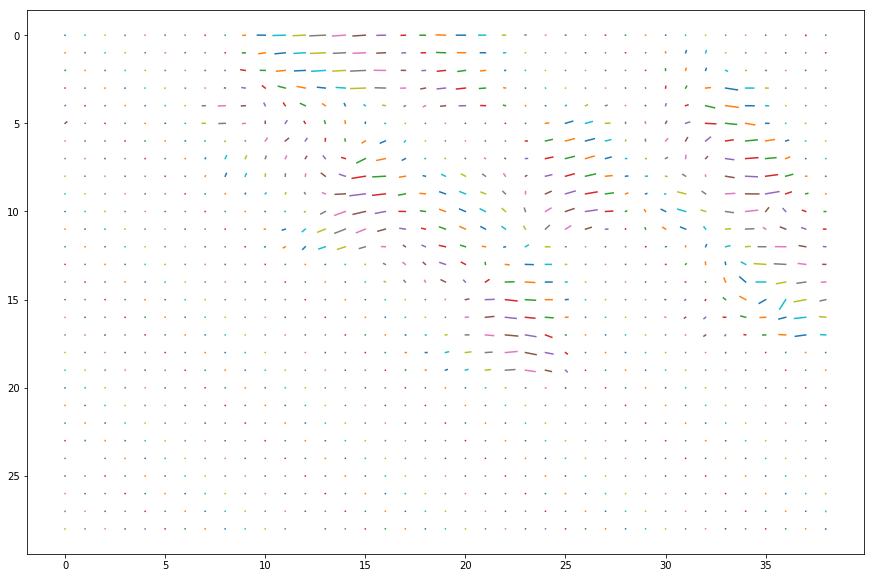

In [12]:
import matplotlib.pyplot as plt
flow_sub = X_dash
flow_x = np.shape(flow_sub)[0]
flow_y = np.shape(flow_sub)[1]
print flow_x
print flow_y
fig = plt.figure(figsize=(15,10))
for x in range(0,flow_x-1):
    for y in range(0,flow_y-1):
        plt.plot([x,x+flow_sub[x,y,0]/1],[y,y+flow_sub[x,y,1]/1],'-')
        
# plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
# plt.legend()
# plt.title('Multiple Critical Points')
plt.gca().invert_yaxis()
plt.savefig('/home/pranav/Downloads/RnD/training/UMN/60_90.png', bbox_inches='tight')

In [127]:
a= np.ones((3,3))
b= np.ones((3,3))
c =a*b
print np.sin(b-2)
print (np.sum(c*np.sin((b-2))))
np.sum(c*np.sin(b-2))/10

[[-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]]
-7.573238863271069


-0.7573238863271069

#### Read Image Sequence

In [3]:
# cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/manipulator_data/16/images/%1d.jpg")

## turn data
cap = cv2.VideoCapture("/home/pranav/Downloads/RnD/training/image_02/0014_turn/%1d.png")


# /home/pranav/Downloads/RnD/training/image_02/0014_turn
keep =True
while(keep):
    ret,frame = cap.read()
#     frame  =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('image',frame)
    key = cv2.waitKey(200) & 0xFF;
    if (key == ord('x')):
            cv2.destroyAllWindows()
            keep = False;
    
#     print(frame.shape)

#### CMA-ES

In [14]:
import cma, time
start = time.clock()
es = cma.CMAEvolutionStrategy(10 * [0], 0.5)
res = es.optimize(cma.ff.rosen)
print res.result.xbest[0]
print time.clock()- start

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1071113, Tue Dec  4 22:06:59 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 1.532384637916658e+02 1.0e+00 4.37e-01  4e-01  4e-01 0:00.0
    2     20 1.795590812800653e+02 1.2e+00 4.06e-01  4e-01  4e-01 0:00.0
    3     30 1.262291997332483e+02 1.2e+00 3.69e-01  3e-01  4e-01 0:00.0
  100   1000 8.409085649064370e+00 5.8e+00 2.25e-02  8e-03  4e-02 0:00.4
  200   2000 5.116121769176537e+00 7.4e+00 3.64e-02  8e-03  2e-02 0:00.7
  300   3000 2.634042676838614e+00 1.2e+01 5.76e-02  7e-03  2e-02 0:01.1
  400   4000 4.048480556405251e-01 2.0e+01 8.09e-02  5e-03  3e-02 0:01.5
  500   5000 7.849363986484351e-04 4.5e+01 1.20e-02  4e-04  8e-03 0:02.0
  600   6000 1.379277351246638e-10 8.7e+01 1.89e-05  3e-07  1e-05 0:02.4
  657   6570 1.197406963181725e-14 8.6e+01 2.47e-07  2e-09  7e-08 0:02.6
1.0000000005553427
4.077059


In [231]:
a= np.array([.006,.06,.24,.38,1,.38,.24,.06, .006])*273
print a/4
a = a.reshape((1,-1)).T
b = a.T
c = a.dot(b)
print c

[ 0.4095  4.095  16.38   25.935  68.25   25.935  16.38    4.095   0.4095]
[[2.68304400e+00 2.68304400e+01 1.07321760e+02 1.69926120e+02
  4.47174000e+02 1.69926120e+02 1.07321760e+02 2.68304400e+01
  2.68304400e+00]
 [2.68304400e+01 2.68304400e+02 1.07321760e+03 1.69926120e+03
  4.47174000e+03 1.69926120e+03 1.07321760e+03 2.68304400e+02
  2.68304400e+01]
 [1.07321760e+02 1.07321760e+03 4.29287040e+03 6.79704480e+03
  1.78869600e+04 6.79704480e+03 4.29287040e+03 1.07321760e+03
  1.07321760e+02]
 [1.69926120e+02 1.69926120e+03 6.79704480e+03 1.07619876e+04
  2.83210200e+04 1.07619876e+04 6.79704480e+03 1.69926120e+03
  1.69926120e+02]
 [4.47174000e+02 4.47174000e+03 1.78869600e+04 2.83210200e+04
  7.45290000e+04 2.83210200e+04 1.78869600e+04 4.47174000e+03
  4.47174000e+02]
 [1.69926120e+02 1.69926120e+03 6.79704480e+03 1.07619876e+04
  2.83210200e+04 1.07619876e+04 6.79704480e+03 1.69926120e+03
  1.69926120e+02]
 [1.07321760e+02 1.07321760e+03 4.29287040e+03 6.79704480e+03
  1.78869600

In [43]:
A = [[0,1],[2,3]]
np.flip(A,0)

array([[2, 3],
       [0, 1]])

### Convert to frames

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/home/pranav/Downloads/RnD/training/QMUL/qmul_junction.avi')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1
